# 大陆深证股票3000点缠绕策略

## 原理 
1. 目前内地因经济下行，长线看跌，有看跌方向做长期保障。
2. 大陆为宏观调控下的 市场经济，因此政策线将滞跌，使股票围绕政策先波动
3. 2与1就形成了 主观与客观的背离
4. 可围绕政策线做波动，但长期看跌

## 交易对象
股票

## 交易周期
D, M

## 交易指标
PPI CPI 人口老龄化率 通胀指数 股票涨跌率 政策线

## 风险控制

## 交易策略


In [1]:
# 中国 CPI 月率报告
import akshare as ak
macro_china_cpi_monthly_df = ak.macro_china_cpi_monthly()
print(macro_china_cpi_monthly_df)
print(macro_china_cpi_monthly_df.name)

1996-02-01    2.1
1996-03-01    2.3
1996-04-01    0.6
1996-05-01    0.7
1996-06-01   -0.5
             ... 
2023-08-09    0.2
2023-09-09    0.3
2023-10-13    0.2
2023-11-09   -0.1
2023-12-09   -0.5
Name: cpi, Length: 322, dtype: float64
cpi


In [3]:
#物流景气指数
macro_china_lpi_index_df = ak.macro_china_lpi_index()
print(macro_china_lpi_index_df)

             日期   最新值       涨跌幅    近3月涨跌幅    近6月涨跌幅     近1年涨跌幅    近2年涨跌幅  \
0    2013-07-01  52.4       NaN       NaN       NaN        NaN       NaN   
1    2013-08-01  52.9  0.954198       NaN       NaN        NaN       NaN   
2    2013-09-01  53.3  0.756144       NaN       NaN        NaN       NaN   
3    2013-10-01  53.6  0.562852  2.290076       NaN        NaN       NaN   
4    2013-11-01  53.0 -1.119403  0.189036       NaN        NaN       NaN   
..          ...   ...       ...       ...       ...        ...       ...   
121  2023-08-01  50.3 -1.178782 -2.330097  0.399202   8.639309  1.616162   
122  2023-09-01  53.5  6.361829  3.481625 -3.603604   5.731225  4.901961   
123  2023-10-01  52.9 -1.121495  3.929273 -1.672862   8.401639 -1.121495   
124  2023-11-01  53.3  0.756144  5.964215  3.495146  14.870690 -0.559701   
125  2023-12-01  53.5  0.375235  0.000000  3.481625  16.304348  1.711027   

       近3年涨跌幅  
0         NaN  
1         NaN  
2         NaN  
3         NaN  
4      

            date      open      high       low     close       volume
8038  2023-11-16  3066.855  3071.452  3050.926  3050.926  27107946000
8039  2023-11-17  3043.617  3055.856  3033.747  3054.366  26760639300
8040  2023-11-20  3056.927  3072.513  3043.515  3068.319  28755699800
8041  2023-11-21  3074.828  3089.774  3063.345  3067.933  33073310200
8042  2023-11-22  3060.498  3067.963  3043.611  3043.611  28905649000
8043  2023-11-23  3041.678  3062.867  3034.297  3061.856  27659205900
8044  2023-11-24  3060.331  3060.331  3037.201  3040.972  28778841300
8045  2023-11-27  3038.186  3038.358  3015.008  3031.700  31051786800
8046  2023-11-28  3028.598  3039.695  3020.231  3038.555  26892074600
8047  2023-11-29  3038.464  3038.977  3017.661  3021.687  27795644800
8048  2023-11-30  3021.103  3030.909  3013.768  3029.673  28294535700
8049  2023-12-01  3027.353  3035.760  3010.233  3031.636  28608970000
8050  2023-12-04  3033.298  3038.979  3022.348  3022.914  28816205300
8051  2023-12-05  30

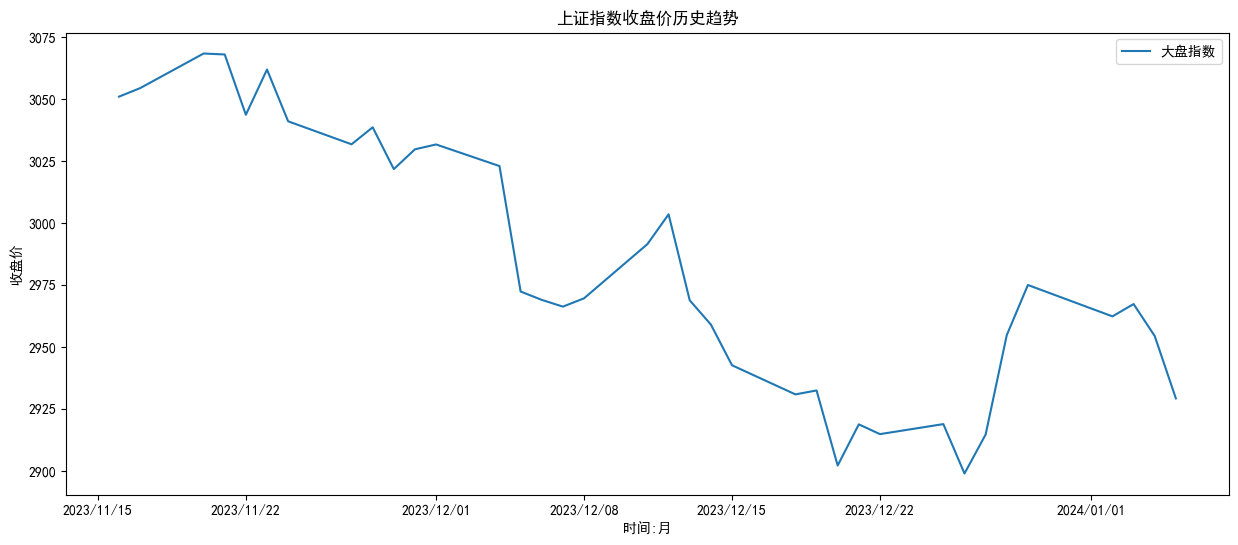

In [6]:
import akshare as ak
import numpy as np

# 取近30天指数
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from pylab import mpl
import matplotlib 


sh000001_close = ak.stock_zh_index_daily(symbol="sh000001")
end_index = sh000001_close.shape[0] - 36

sh000001_close = sh000001_close[end_index:]
print(sh000001_close)

mpl.rcParams['font.sans-serif']=['simhei']# 指定默认字体
mpl.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题
mpl.rcParams['figure.figsize'] = (15.0, 6.0)
#print(type(sh000001_close))


plt.plot(sh000001_close['date'], sh000001_close['close'], label='大盘指数')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y/%m/%d'))
#plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d'))
#plt.gca().xaxis.set_major_locator(mdatesDayLocator())
plt.title("上证指数收盘价历史趋势")
plt.xlabel('时间:月')
plt.ylabel('收盘价')
plt.legend()
plt.show()

In [1]:
 #东方财富网-沪 A 股-实时行情数据
import akshare as ak

stock_sh_a_spot_em_df = ak.stock_sh_a_spot_em()
print(stock_sh_a_spot_em_df)

        序号      代码    名称     最新价    涨跌幅    涨跌额        成交量          成交额     振幅  \
0        1  688222  成都先导   17.06  14.34   2.14   205850.0  342653686.0  14.61   
1        2  601188  龙江交通    4.36  10.10   0.40   727234.0  306524213.0   9.34   
2        3  600805  悦达投资    6.14  10.04   0.56   185815.0  114090551.0   0.00   
3        4  600844  丹化科技    3.73  10.03   0.34  1128646.0  418379163.0   6.19   
4        5  600593  大连圣亚   24.92  10.02   2.27    86489.0  214090072.0   4.06   
...    ...     ...   ...     ...    ...    ...        ...          ...    ...   
2362  2363  603333  尚纬股份    6.22  -9.99  -0.69   544003.0  339753341.0   3.18   
2363  2364  603530  神马电力   22.58 -10.00  -2.51   281590.0  670899293.0  12.99   
2364  2365  605118  力鼎光电   26.34 -10.01  -2.93   198855.0  543187193.0   9.94   
2365  2366  603332  苏州龙杰   12.48 -10.02  -1.39   462164.0  615854534.0  16.73   
2366  2367  688502  茂莱光学  184.20 -11.23 -23.30     9952.0  188104121.0  11.86   

          最高  ...    量比    